# **Read in Data and Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
# Reads and stores content as an excel file
read_file = pd.read_excel("new_dataset.xlsx")
#Writes the dataframe object into csv file
read_file.to_csv ("Test.csv",
                  index = None,
                  header=True)
# reads csv file and converts it into a dataframe object
df = pd.DataFrame(pd.read_csv("Test.csv"))
#show dataframe
df

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1
...,...,...,...,...,...,...,...,...
1994,2081,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,5,Gift for my wife to listen to her music when s...,My wife loves it!,0
1995,2082,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,4,This gizmo is awesome for those who want the p...,Neat little speaker!,0
1996,2083,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,5,It's a nice item but really there's other thin...,Nice,0
1997,2084,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,4,Must have for people who have an Amazon Prime ...,Nice addition for Echo owners,0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#shows first five rows
df.head()

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1


# **Cleaning the Data**

## Remove Punctuation

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
#Function to remove punctuation
def remove_punct(text):
  text_nopunct = "".join([char for char in text if char not in string.punctuation]) # This will discard all punctutation
  return text_nopunct

df['nopunct.review_text'] = df['reviews.text'].apply(lambda x:remove_punct(x))
df.head()

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...


## Tokenize

In [9]:
import re
# Function to tokenise words
def tokenize(text):
  tokens = re.split('\W+', text) # W+ means that either a word character (A-Za-z0-9) or a dash(-) can go there
  return tokens

df['tokenized.review_text'] = df['nopunct.review_text'].apply(lambda x:tokenize(x.lower()))
# We convert to Lower as Python is case sensitive

df.head()


,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ..."
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,..."
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w..."
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl..."
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished..."


## Remove stopwords

In [10]:
import nltk
nltk.download("stopwords")
#nltk.download('all')

stopwords = nltk.corpus.stopwords.words('english')#All English Stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords =['amazon','ipad','electronic', 'electronics', 'firestick', 'Kindle',
                        'Alexa','tablet','touchscreen', 'kindle', 'fire', 'echo','alexa', 'apps'
                        'speaker', 'google', 'screen','voyage', 'device', 'book', 'battery', 'apps', 'read', 'reading'
                        'page', 'reader', ] # Created new stopword list containing words not in NLTK corpus
for i in new_stopwords:
  stopwords.append(i) #appended list of stopwords to include new words
print(stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopwords] #To remove all stopwords
  return text

df['nostop.review_text'] = df['tokenized.review_text'].apply(lambda x: remove_stopwords(x))

df.head()

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,nostop.review_text
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par..."
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,...","[bit, smaller, apples, wireless, keyboard, sti..."
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w...","[weeks, ago, bemoaning, fact, scoop, back, rel..."
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl...","[like, lot, reviewers, struggled, find, right,..."
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished...","[stay, away, certified, refurbished, tv, recei..."


## Stemming

In [13]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

df['stemmed.review_text'] = df['nostop.review_text'].apply(lambda x: stemming(x))

df.head()

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,nostop.review_text,stemmed.review_text
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par...","[kid, want, pay, 1999, item, critic, part, fun..."
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,...","[bit, smaller, apples, wireless, keyboard, sti...","[bit, smaller, appl, wireless, keyboard, still..."
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w...","[weeks, ago, bemoaning, fact, scoop, back, rel...","[week, ago, bemoan, fact, scoop, back, releas,..."
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl...","[like, lot, reviewers, struggled, find, right,...","[like, lot, review, struggl, find, right, blue..."
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished...","[stay, away, certified, refurbished, tv, recei...","[stay, away, certifi, refurbish, tv, receiv, t..."


## Lemmatize

In [14]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text

df['lemmatized.review_text'] = df['nostop.review_text'].apply(lambda x: lemmatizing(x))

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,nostop.review_text,stemmed.review_text,lemmatized.review_text
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par...","[kid, want, pay, 1999, item, critic, part, fun...","[kidding, want, pay, 1999, item, critical, par..."
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,...","[bit, smaller, apples, wireless, keyboard, sti...","[bit, smaller, appl, wireless, keyboard, still...","[bit, smaller, apple, wireless, keyboard, stil..."
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w...","[weeks, ago, bemoaning, fact, scoop, back, rel...","[week, ago, bemoan, fact, scoop, back, releas,...","[week, ago, bemoaning, fact, scoop, back, rele..."
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl...","[like, lot, reviewers, struggled, find, right,...","[like, lot, review, struggl, find, right, blue...","[like, lot, reviewer, struggled, find, right, ..."
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished...","[stay, away, certified, refurbished, tv, recei...","[stay, away, certifi, refurbish, tv, receiv, t...","[stay, away, certified, refurbished, tv, recei..."


In [15]:
import spacy

nlp = spacy.load("en_core_web_sm")
# Function to perform PoS tagging on a list of tokens
def pos_tagging(tokens):
    # Join the tokens into a space-separated string
    text = " ".join(tokens)

    # Process the text with spaCy
    doc = nlp(text)

    # Extract the PoS tags for each token
    pos_tags = [(token.text, token.pos_) for token in doc]

    return pos_tags

# Apply PoS tagging to the lemmatized text
df["pos_tags"] = df["lemmatized.review_text"].apply(pos_tagging)

In [16]:
df.head()

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,nostop.review_text,stemmed.review_text,lemmatized.review_text,pos_tags
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par...","[kid, want, pay, 1999, item, critic, part, fun...","[kidding, want, pay, 1999, item, critical, par...","[(kidding, VERB), (want, VERB), (pay, VERB), (..."
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,...","[bit, smaller, apples, wireless, keyboard, sti...","[bit, smaller, appl, wireless, keyboard, still...","[bit, smaller, apple, wireless, keyboard, stil...","[(bit, NOUN), (smaller, ADJ), (apple, NOUN), (..."
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w...","[weeks, ago, bemoaning, fact, scoop, back, rel...","[week, ago, bemoan, fact, scoop, back, releas,...","[week, ago, bemoaning, fact, scoop, back, rele...","[(week, NOUN), (ago, ADV), (bemoaning, VERB), ..."
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl...","[like, lot, reviewers, struggled, find, right,...","[like, lot, review, struggl, find, right, blue...","[like, lot, reviewer, struggled, find, right, ...","[(like, INTJ), (lot, NOUN), (reviewer, NOUN), ..."
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished...","[stay, away, certified, refurbished, tv, recei...","[stay, away, certifi, refurbish, tv, receiv, t...","[stay, away, certified, refurbished, tv, recei...","[(stay, VERB), (away, ADV), (certified, VERB),..."


In [17]:
df.to_csv('stemmed.csv', header=True)

In [18]:
#.drop(df.columns[[0,1,6,8,9,10,11]], axis = 1)

# **Readability**
I have imported the readability measures via the Textstat library which will be used as in input feature

In [19]:
pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.8 MB/s eta 0:00:00


In [20]:
import textstat

In [21]:
text_data = df['reviews.text']

flesch_scores = [textstat.flesch_reading_ease(text) for text in text_data]
df['flesch_reading_ease'] = flesch_scores

smog_index = [textstat.smog_index(text) for text in text_data]
df['smog_index'] = smog_index

flesch_kincaid_grade = [textstat.flesch_kincaid_grade(text) for text in text_data]
df['flesch_kincaid_grade'] = flesch_kincaid_grade

coleman_liau_index = [textstat.coleman_liau_index(text) for text in text_data]
df['coleman_liau_index'] = coleman_liau_index

automated_readability_index = [textstat.automated_readability_index(text) for text in text_data]
df['automated_readability_index'] = automated_readability_index

In [22]:
#df['flesch_reading_ease'] = flesch_scores
df.head(1)

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,nostop.review_text,stemmed.review_text,lemmatized.review_text,pos_tags,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par...","[kid, want, pay, 1999, item, critic, part, fun...","[kidding, want, pay, 1999, item, critical, par...","[(kidding, VERB), (want, VERB), (pay, VERB), (...",77.94,9.7,4.9,5.37,3.8


## Data Splitting for Readability measures and He

In [23]:
y = df['Helpful']
y

0       1
1       1
2       1
3       1
4       1
       ..
1994    0
1995    0
1996    0
1997    0
1998    0
Name: Helpful, Length: 1999, dtype: int64

In [24]:
x = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], axis = 1) # Drops columns not being used for experiments
x

,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
0,9.7,4.9,5.37,3.8
1,6.9,4.9,7.53,7.4
2,8.5,6.3,6.09,7.9
3,9.0,5.6,6.72,6.9
4,11.9,8.9,9.74,10.1
...,...,...,...,...
1994,0.0,7.2,5.92,8.8
1995,0.0,7.6,7.37,8.8
1996,0.0,4.6,4.78,3.7
1997,8.8,6.4,8.10,6.3


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [26]:
x_train

,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
979,0.0,0.5,2.10,1.1
1432,8.6,5.0,4.69,4.3
864,0.0,6.6,8.51,6.6
1087,0.0,9.5,9.28,10.3
1064,8.8,4.0,4.54,2.7
...,...,...,...,...
1879,7.8,5.5,5.97,5.6
1895,0.0,4.4,3.58,2.6
1859,0.0,4.8,10.82,8.1
792,0.0,2.9,3.55,2.0


### Regression Models for Readability

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#clf = RandomForestClassifier()
#clf.fit(x_train, y_train)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [30]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Test): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.230343122549475
LR R2 (Test):  0.05967651244636085
LR MSE (Test):  0.22867065984363066
LR R2 (Test):  0.06280115845741674


In [31]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']

In [32]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.230343,0.059677,0.228671,0.062801


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [34]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [36]:
rf_results = pd.DataFrame(['Classification Random Forest', rf_train_mse, rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Classification Random Forest,0.226006,0.077382,0.22728,0.068501


In [37]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.230343,0.059677,0.228671,0.062801
0,Classification Random Forest,0.226006,0.077382,0.22728,0.068501


### classification model for readability

In [38]:
#from pydataset import data
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [40]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       231
           1       0.55      0.56      0.56       169

    accuracy                           0.62       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.62      0.62      0.62       400



In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
clf2=KNeighborsClassifier(7)
clf2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
y_pred=clf2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       231
           1       0.54      0.53      0.53       169

    accuracy                           0.61       400
   macro avg       0.60      0.60      0.60       400
weighted avg       0.61      0.61      0.61       400



In [44]:
from sklearn import svm


In [45]:
h1=svm.LinearSVC(C=1)

In [46]:
h1.fit(x_train,y_train)
h1.score(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5928705440900562

In [47]:
y_pred=h1.predict(x_test)
pd.crosstab(y_test,y_pred)

col_0,0,1
Helpful,,
0,188,43
1,117,52


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70       231
           1       0.55      0.31      0.39       169

    accuracy                           0.60       400
   macro avg       0.58      0.56      0.55       400
weighted avg       0.59      0.60      0.57       400



# Data Vectorization
This is the processing of encoding text as integers in order to create **feature vecors** so that machine learning algorithms can understand language There are 3 primary methods used these include:

1) Bag-of-Words

2)N-Grams

3)TF-IDF

In [49]:
def cleanText(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

stopwords = nltk.corpus.stopwords.words('english')

## Bag-of-Words

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=cleanText)
X_counts = count_vect.fit_transform(df['reviews.text'])
#print(X_counts)
print(count_vect.get_feature_names_out())
#pd.DataFrame(count_vect.get_feature_names_out()).to_csv('/content/drive/sample.csv')
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
X_counts_df.head(10)


['' '0' '015' ... 'äù' 'äúalexa' 'äúdualbatteri']


,,0,015,085,09,09500043200,1,10,100,1000,...,äì,äîand,äô,äôm,äôre,äôt,äôve,äù,äúalexa,äúdualbatteri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.head(10)

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,nostop.review_text,stemmed.review_text,lemmatized.review_text,pos_tags,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par...","[kid, want, pay, 1999, item, critic, part, fun...","[kidding, want, pay, 1999, item, critical, par...","[(kidding, VERB), (want, VERB), (pay, VERB), (...",77.94,9.7,4.9,5.37,3.8
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,...","[bit, smaller, apples, wireless, keyboard, sti...","[bit, smaller, appl, wireless, keyboard, still...","[bit, smaller, apple, wireless, keyboard, stil...","[(bit, NOUN), (smaller, ADJ), (apple, NOUN), (...",83.56,6.9,4.9,7.53,7.4
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w...","[weeks, ago, bemoaning, fact, scoop, back, rel...","[week, ago, bemoan, fact, scoop, back, releas,...","[week, ago, bemoaning, fact, scoop, back, rele...","[(week, NOUN), (ago, ADV), (bemoaning, VERB), ...",85.32,8.5,6.3,6.09,7.9
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl...","[like, lot, reviewers, struggled, find, right,...","[like, lot, review, struggl, find, right, blue...","[like, lot, reviewer, struggled, find, right, ...","[(like, INTJ), (lot, NOUN), (reviewer, NOUN), ...",81.53,9.0,5.6,6.72,6.9
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished...","[stay, away, certified, refurbished, tv, recei...","[stay, away, certifi, refurbish, tv, receiv, t...","[stay, away, certified, refurbished, tv, recei...","[(stay, VERB), (away, ADV), (certified, VERB),...",62.38,11.9,8.9,9.74,10.1
5,6,Amazon Kindle Replacement Power Adapter (Fits ...,1,288,5,Since the details for the items are a little s...,Kindle Power Adapter Specs,1,Since the details for the items are a little s...,"[since, the, details, for, the, items, are, a,...","[since, details, items, little, sparse, though...","[sinc, detail, item, littl, spars, thought, wo...","[since, detail, item, little, sparse, thought,...","[(since, SCONJ), (detail, NOUN), (item, NOUN),...",87.92,5.7,3.2,8.20,6.3
6,7,Kindle PowerFast International Charging Kit (f...,1,238,5,"I do a lot of international travelling, so I h...",Very Nice International Charger,1,I do a lot of international travelling so I ha...,"[i, do, a, lot, of, international, travelling,...","[lot, international, travelling, bought, every...","[lot, intern, travel, bought, everi, convers, ...","[lot, international, travelling, bought, every...","[(lot, NOUN), (international, ADJ), (travellin...",70.53,10.3,7.8,7.54,8.4
7,8,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,220,1,"No reason. This product is described as 5W, 1 ...",Why yet another charger,1,No reason This product is described as 5W 1 am...,"[no, reason, this, product, is, described, as,...","[reason, product, described, 5w, 1, amp, line,...","[reas

In [52]:
X_counts_df.head(10)

,,0,015,085,09,09500043200,1,10,100,1000,...,äì,äîand,äô,äôm,äôre,äôt,äôve,äù,äúalexa,äúdualbatteri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **TF-IDF**
We will apply the TF-IDF vectorizer to our data to transform the textual data into numerical values which will be used as input for our ML models

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=cleanText)
X_tfidf = tfidf_vect.fit_transform(df['reviews.text'])
print(X_tfidf.shape)
#print(tfidf_vect.get_feature_names())
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
X_tfidf_df.head(10)


(1999, 3421)


,,0,015,085,09,09500043200,1,10,100,1000,...,äì,äîand,äô,äôm,äôre,äôt,äôve,äù,äúalexa,äúdualbatteri
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.079327,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.079327,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.205653,0.205653,0.0,0.205653,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.124225,0.000000,0.066645,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.080482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.080482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Concatenating Dataframes
I will need to combine the two different dataframes created, the X_tfidf_df and the originally created dataframes

In [54]:
concatenated_df = pd.concat([df, X_tfidf_df], axis=1)
#print(concatenated_df)
concatenated_df.head()

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,...,äì,äîand,äô,äôm,äôre,äôt,äôve,äù,äúalexa,äúdualbatteri
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# check both dataframes have been concatenated successfully
concatenated_df

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,...,äì,äîand,äô,äôm,äôre,äôt,äôve,äù,äúalexa,äúdualbatteri
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2081,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,5,Gift for my wife to listen to her music when s...,My wife loves it!,0,Gift for my wife to listen to her music when s...,"[gift, for, my, wife, to, listen, to, her, mus...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,2082,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,4,This gizmo is awesome for those who want the p...,Neat little speaker!,0,This gizmo is awesome for those who want the p...,"[this, gizmo, is, awesome, for, those, who, wa...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,2083,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,5,It's a nice item but really there's other thin...,Nice,0,Its a nice item but really theres other things...,"[its, a, nice, item, but, really, theres, othe...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,2084,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,4,Must have for people who have an Amazon Prime ...,Nice addition for Echo owners,0,Must have for people who have an Amazon Prime ...,"[must, have, for, people, who, have, an, amazo...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Splitting
We will now split our data into x and y, where x represents the and y represents our target which is a 1 or 0

In [56]:
concatenated_df

,unique_id,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,Helpful,nopunct.review_text,tokenized.review_text,...,äì,äîand,äô,äôm,äôre,äôt,äôve,äù,äúalexa,äúdualbatteri
0,1,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,cannot believe this is not included with the K...,1,Is Amazon kidding me They want me to pay 1999 ...,"[is, amazon, kidding, me, they, want, me, to, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,Great keyboard,1,Its a bit smaller than Apples wireless keyboar...,"[its, a, bit, smaller, than, apples, wireless,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,1,It was just a few weeks ago that I was bemoani...,"[it, was, just, a, few, weeks, ago, that, i, w...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",An excellent keyboard -- with one significant ...,1,Like a lot of reviewers here I struggled to fi...,"[like, a, lot, of, reviewers, here, i, struggl...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,"Purchase a new one, stay away from the refurbi...",1,Stay away from the certified refurbished Amazo...,"[stay, away, from, the, certified, refurbished...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2081,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,5,Gift for my wife to listen to her music when s...,My wife loves it!,0,Gift for my wife to listen to her music when s...,"[gift, for, my, wife, to, listen, to, her, mus...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,2082,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,4,This gizmo is awesome for those who want the p...,Neat little speaker!,0,This gizmo is awesome for those who want the p...,"[this, gizmo, is, awesome, for, those, who, wa...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,2083,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,5,It's a nice item but really there's other thin...,Nice,0,Its a nice item but really theres other things...,"[its, a, nice, item, but, really, theres, othe...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,2084,Amazon Tap Smart Assistant Alexaenabled (black...,1,0,4,Must have for people who have an Amazon Prime ...,Nice addition for Echo owners,0,Must have for people who have an Amazon Prime ...,"[must, have, for, people, who, have, an, amazo...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
concatenated_df.to_csv('concatenate.csv', header=True, index=True)

In [58]:
final_df = pd.read_csv('/content/final.csv')
#liwc_df = pd.read_csv('/content/liwc results.csv')

In [59]:
y = final_df['Helpful']
y

0       1
1       1
2       1
3       1
4       1
       ..
1994    0
1995    0
1996    0
1997    0
1998    0
Name: Helpful, Length: 1999, dtype: int64

In [60]:
x = final_df.drop(final_df.columns[[2]], axis = 1)
x

,reviews.doRecommend,reviews.rating,neg,neu,pos,compound,WC,Analytic,Clout,Authentic,...,youll,young,younger,youngest,your,youtub,youv,yr,zero,zippi
0,0,1,0.196,0.674,0.129,-0.5106,31,69.92,4.40,35.88,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,5,0.026,0.767,0.207,0.9680,95,75.71,11.47,33.61,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,1,5,0.050,0.844,0.106,0.9277,201,21.73,40.06,62.67,...,0.096836,0.0,0.0,0.0,0.0,0.0,0.111644,0.0,0.0,0.0
3,1,4,0.169,0.786,0.045,-0.9890,305,61.27,2.71,85.44,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,1,0.150,0.789,0.061,-0.8720,109,77.90,13.99,45.04,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1,5,0.000,0.879,0.121,0.4404,22,58.76,96.39,1.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1995,1,4,0.000,0.680,0.320,0.7901,20,26.10,97.73,1.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1996,1,5,0.000,0.899,0.101,0.2263,19,1.00,14.81,99.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1997,1,4,0.000,0.842,0.158,0.7003,33,54.26,94.21,1.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [62]:
x_train

,reviews.doRecommend,reviews.rating,neg,neu,pos,compound,WC,Analytic,Clout,Authentic,...,youll,young,younger,youngest,your,youtub,youv,yr,zero,zippi
979,1,5,0.110,0.689,0.202,0.4356,16,1.97,1.71,99.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1432,1,5,0.084,0.800,0.116,0.7160,175,41.40,43.42,35.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
864,1,5,0.191,0.712,0.097,-0.3609,23,97.20,5.93,92.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1087,1,4,0.000,0.777,0.223,0.8360,38,36.67,1.34,93.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064,1,5,0.040,0.705,0.255,0.9169,47,92.17,1.56,57.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1,5,0.000,0.709,0.291,0.9348,44,76.99,86.82,11.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1895,1,5,0.000,0.719,0.281,0.5994,12,97.04,40.06,39.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1859,1,5,0.000,0.473,0.527,0.8720,10,89.52,1.00,63.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
792,1,5,0.000,0.674,0.326,0.7430,16,78.28,99.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
x_test

,reviews.doRecommend,reviews.rating,neg,neu,pos,compound,WC,Analytic,Clout,Authentic,...,youll,young,younger,youngest,your,youtub,youv,yr,zero,zippi
1852,1,5,0.000,0.725,0.275,0.7650,25,63.53,19.67,3.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,1,5,0.000,0.398,0.602,0.9201,12,73.36,6.61,3.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,1,5,0.027,0.836,0.137,0.6786,57,4.76,3.34,58.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,1,4,0.000,0.758,0.242,0.9020,47,67.32,18.61,4.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,1,5,0.029,0.719,0.252,0.9265,62,28.14,40.06,6.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1,5,0.037,0.772,0.190,0.7876,38,44.40,7.50,18.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1948,1,5,0.000,0.658,0.342,0.8349,24,37.30,40.06,3.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851,1,5,0.000,0.755,0.245,0.7579,24,37.30,40.06,3.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1585,1,5,0.109,0.677,0.214,0.4588,15,59.67,77.41,1.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
y_train

979     0
1432    0
864     0
1087    0
1064    0
       ..
1879    0
1895    0
1859    0
792     1
1544    0
Name: Helpful, Length: 1599, dtype: int64

# **Model Building**

##  Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#clf = RandomForestClassifier()
#clf.fit(x_train, y_train)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [66]:
#print(lr.feature_importances_)

## Make Prediction

In [67]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [68]:
y_lr_train_pred

array([-1.69754028e-04,  2.70652771e-03,  1.88617706e-02, ...,
        3.51028442e-02,  1.00742340e+00, -5.32150269e-04])

In [69]:
y_lr_test_pred

array([-4.72754522e+07,  2.82319669e+08,  1.00934219e+00,  1.32567037e+08,
        1.55105591e-02,  9.95708466e-01,  8.70895386e-03,  1.00302124e+00,
       -1.41786479e+08, -2.93200468e+08,  4.96313095e-01, -9.08304708e+07,
       -6.01428194e+08,  1.02535057e+00,  9.98849869e-01,  2.47898102e-02,
        1.00578499e+00, -1.31385683e+08,  6.73721313e-01,  8.82891299e+07,
        7.42062567e+08,  2.29333942e+07,  6.68178558e-01, -1.02257768e+08,
        1.01628304e+00,  6.99996948e-03,  3.33333351e+07,  1.02985954e+00,
       -7.83763156e+07,  9.76285934e-01, -8.92745441e+07,  4.94003296e-04,
       -3.21292031e+07,  9.70308380e+07, -1.69219971e-02,  1.19046682e+07,
        7.16313390e+06, -4.15977748e+07, -9.32456445e+07,  2.35849662e+08,
        1.00976372e+00,  3.64471005e+07,  3.47337723e-01,  2.85090513e+08,
        1.01567459e+00, -1.97124481e-02,  1.00606918e+00, -3.62682343e-02,
       -2.69882283e+06,  9.90674973e-01, -6.01387024e-03,  6.21604919e-03,
       -6.63185468e+07,  

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

### `Evaluate Model`

In [71]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Test): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.021061024506681163
LR R2 (Test):  0.9140231503490129
LR MSE (Test):  2.0981287326036176e+16
LR R2 (Test):  -8.599108512425494e+16


In [72]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']

In [73]:
#lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
#lr_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']


In [74]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.021061,0.914023,20981287326036176.0,-85991085124254944.0


## Random **Forest**

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [76]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [78]:
rf_results = pd.DataFrame(['Classification Random Forest', rf_train_mse, rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Classification Random Forest,0.202628,0.172816,0.204018,0.163837


In [79]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.021061,0.914023,20981287326036176.0,-85991085124254944.0
0,Classification Random Forest,0.202628,0.172816,0.204018,0.163837


# Data Visualisation

Text(0.5, 0, 'Review features')

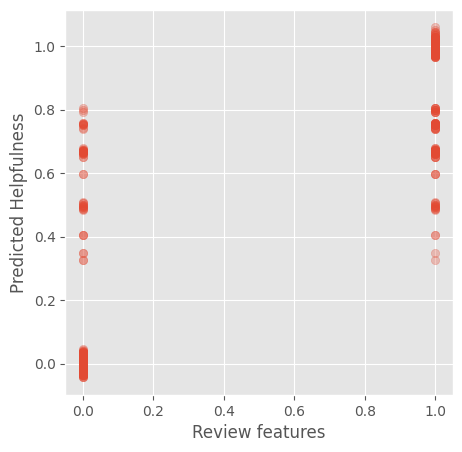

In [80]:
import matplotlib.pyplot as plt
#import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

#z= np.polyfit(y_train, y_lr_train_pred, 1)
#p = np.polyld(z)

plt.plot()
plt.ylabel('Predicted Helpfulness')
plt.xlabel('Review features')


# Classification- Naive Bayes

In [81]:
#from pydataset import data
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [82]:
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [83]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       231
           1       0.69      0.68      0.69       169

    accuracy                           0.74       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.74      0.74       400



# K-Nearest Neighbours

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
clf2=KNeighborsClassifier(7)
clf2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [86]:
y_pred=clf2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       231
           1       0.55      0.57      0.56       169

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.63      0.62      0.63       400



# Support Vector Machines

In [87]:
from sklearn import svm

In [88]:
h1=svm.LinearSVC(C=1)

In [89]:
h1.fit(x_train,y_train)
h1.score(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5522201375859912

In [90]:
y_pred=h1.predict(x_test)
pd.crosstab(y_test,y_pred)

col_0,0,1
Helpful,,
0,50,181
1,8,161


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.22      0.35       231
           1       0.47      0.95      0.63       169

    accuracy                           0.53       400
   macro avg       0.67      0.58      0.49       400
weighted avg       0.70      0.53      0.47       400



In [92]:
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification

# **Sentiment Analysis - Exploratory Analysis**
We will perform our sentiment analysis using the popular technique of VADER (Valence Aware Dictionary and sEntiment Reasoner) - This uses a Bag of Words Approach

# Quick EDA (Exploratory Data Analysis)

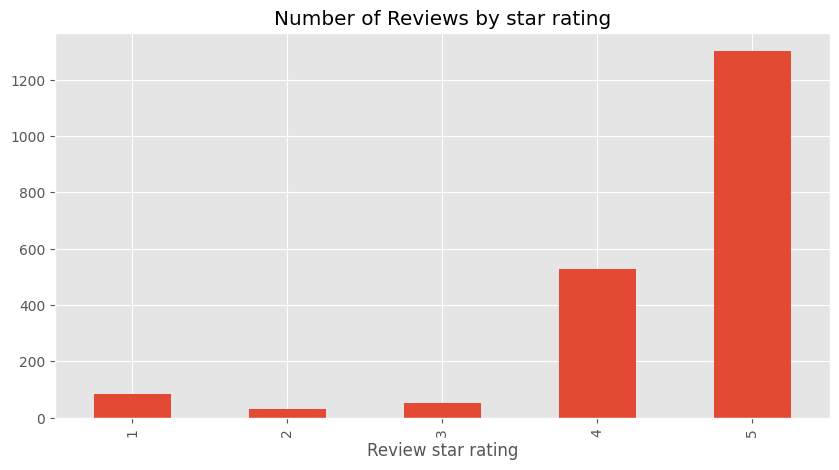

In [93]:
ax = df['reviews.rating'].value_counts().sort_index()\
  .plot(kind ='bar',
        title = 'Number of Reviews by star rating',
        figsize=(10,5))
ax.set_xlabel('Review star rating')
plt.show()

In [96]:
from nltk.sentiment  import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [98]:
# Example statement has been used to test Polarity using The VADER model
example = df['reviews.text'] [10]
print(example)
sia.polarity_scores(example)

I've had lots of tablets in the past, mostly from the Samsung line, but this is my first Amazon Fire, so I want to write this review for others who have never tried one of these. At the time that this was written, Alexa had not been added to the tablet.First, while this device runs an Android type of operating system, Amazon puts its own spin on the operating system. I don't feel like I'm using Android. This feels different to me. It doesn't have the same level of customization that Android users have come to appreciate. That being said, if you are an Amazon Prime member, this device has been tailored to be your content entertainment machine. It's simply a fun way to consume your magazines, books, etc.There are 3 on-screen buttons on the bottom of the device. The middle button immediately takes you to your home screen. The button to the left acts as a sort of "back" button. It also lets me get rid of my keyboard when I don't need it on screen, but it's open. The button to the right is 

{'neg': 0.035, 'neu': 0.848, 'pos': 0.117, 'compound': 0.9992}

In [99]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  reviewtext = row['reviews.text']
  myid= row['unique_id']
  res[myid] = sia.polarity_scores(reviewtext)

  0%|          | 0/1999 [00:00<?, ?it/s]

In [100]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'unique_id'})
vaders = vaders.merge(df, how='left')

In [101]:
vaders.head() # each review now has sentiment score

,unique_id,neg,neu,pos,compound,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,...,tokenized.review_text,nostop.review_text,stemmed.review_text,lemmatized.review_text,pos_tags,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
0,1,0.196,0.674,0.129,-0.5106,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par...","[kid, want, pay, 1999, item, critic, part, fun...","[kidding, want, pay, 1999, item, critical, par...","[(kidding, VERB), (want, VERB), (pay, VERB), (...",77.94,9.7,4.9,5.37,3.8
1,2,0.026,0.767,0.207,0.9680,AmazonBasics Bluetooth Keyboard for Android De...,1,525,5,It's a bit smaller than Apple's wireless keybo...,...,"[its, a, bit, smaller, than, apples, wireless,...","[bit, smaller, apples, wireless, keyboard, sti...","[bit, smaller, appl, wireless, keyboard, still...","[bit, smaller, apple, wireless, keyboard, stil...","[(bit, NOUN), (smaller, ADJ), (apple, NOUN), (...",83.56,6.9,4.9,7.53,7.4
2,3,0.050,0.844,0.106,0.9277,Amazon Tap Smart Assistant Alexaenabled (black...,1,434,5,It was just a few weeks ago that I was bemoani...,...,"[it, was, just, a, few, weeks, ago, that, i, w...","[weeks, ago, bemoaning, fact, scoop, back, rel...","[week, ago, bemoan, fact, scoop, back, releas,...","[week, ago, bemoaning, fact, scoop, back, rele...","[(week, NOUN), (ago, ADV), (bemoaning, VERB), ...",85.32,8.5,6.3,6.09,7.9
3,4,0.169,0.786,0.045,-0.9890,AmazonBasics Bluetooth Keyboard for Android De...,1,345,4,"Like a lot of reviewers here, I struggled to f...",...,"[like, a, lot, of, reviewers, here, i, struggl...","[like, lot, reviewers, struggled, find, right,...","[like, lot, review, struggl, find, right, blue...","[like, lot, reviewer, struggled, find, right, ...","[(like, INTJ), (lot, NOUN), (reviewer, NOUN), ...",81.53,9.0,5.6,6.72,6.9
4,5,0.150,0.789,0.061,-0.8720,Certified Refurbished Amazon Fire TV with Alex...,0,292,1,Stay away from the certified refurbished Amazo...,...,"[stay, away, from, the, certified, refurbished...","[stay, away, certified, refurbished, tv, recei...","[stay, away, certifi, refurbish, tv, receiv, t...","[stay, away, certified, refurbished, tv, recei...","[(stay, VERB), (away, ADV), (certified, VERB),...",62.38,11.9,8.9,9.74,10.1


# Plot VADER results

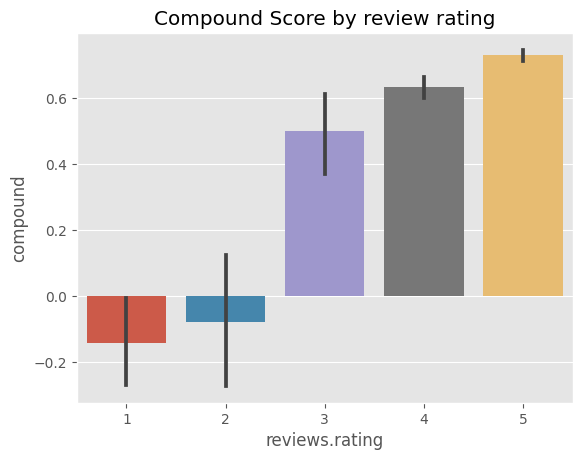

In [102]:
ax = sns.barplot(data=vaders, x='reviews.rating', y='compound')
ax.set_title('Compound Score by review rating')
plt.show()

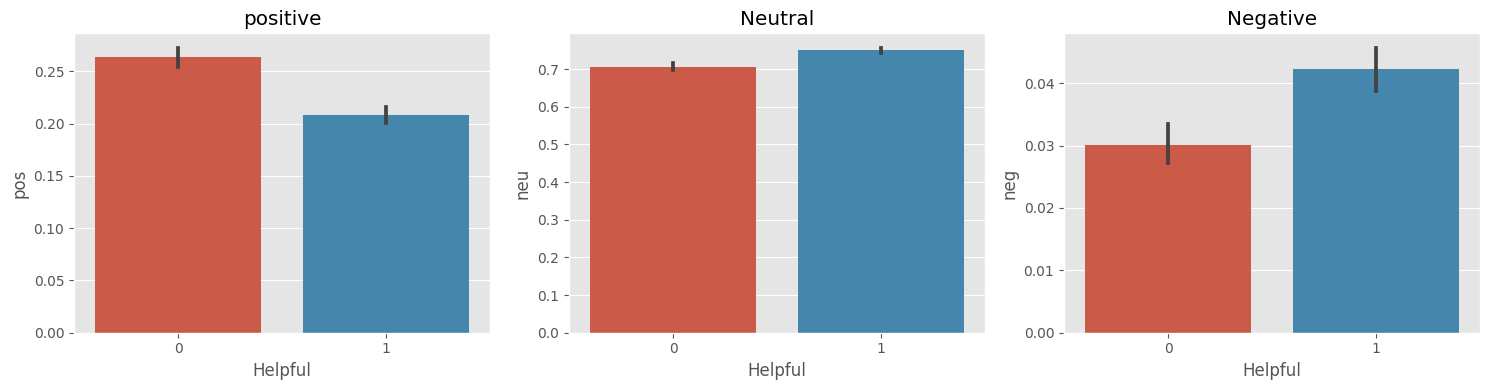

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.barplot(data=vaders, x='Helpful', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Helpful', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Helpful', y='neg', ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# **Sentiment Classification**#
Using the polarity scores calculated, we will build Classification models to predict whether this can aid in accurately predicting helpful reviews

In [104]:
vaders.head(1)

,unique_id,neg,neu,pos,compound,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,...,tokenized.review_text,nostop.review_text,stemmed.review_text,lemmatized.review_text,pos_tags,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
0,1,0.196,0.674,0.129,-0.5106,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par...","[kid, want, pay, 1999, item, critic, part, fun...","[kidding, want, pay, 1999, item, critical, par...","[(kidding, VERB), (want, VERB), (pay, VERB), (...",77.94,9.7,4.9,5.37,3.8


In [105]:
vaders_df = pd.DataFrame(vaders)

In [106]:
vaders_df.head(1)

,unique_id,neg,neu,pos,compound,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,...,tokenized.review_text,nostop.review_text,stemmed.review_text,lemmatized.review_text,pos_tags,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
0,1,0.196,0.674,0.129,-0.5106,Oem Amazon Kindle Power Usb Adapter Wall Trave...,0,621,1,Is Amazon kidding me They want me to pay 19.99...,...,"[is, amazon, kidding, me, they, want, me, to, ...","[kidding, want, pay, 1999, item, critical, par...","[kid, want, pay, 1999, item, critic, part, fun...","[kidding, want, pay, 1999, item, critical, par...","[(kidding, VERB), (want, VERB), (pay, VERB), (...",77.94,9.7,4.9,5.37,3.8


In [107]:
vaders_df.drop(['name','reviews.text','reviews.title','nopunct.review_text', 'tokenized.review_text',
         'nostop.review_text', 'stemmed.review_text', 'lemmatized.review_text'], axis=1   )

,unique_id,neg,neu,pos,compound,reviews.doRecommend,reviews.numHelpful,reviews.rating,Helpful,pos_tags,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
0,1,0.196,0.674,0.129,-0.5106,0,621,1,1,"[(kidding, VERB), (want, VERB), (pay, VERB), (...",77.94,9.7,4.9,5.37,3.8
1,2,0.026,0.767,0.207,0.9680,1,525,5,1,"[(bit, NOUN), (smaller, ADJ), (apple, NOUN), (...",83.56,6.9,4.9,7.53,7.4
2,3,0.050,0.844,0.106,0.9277,1,434,5,1,"[(week, NOUN), (ago, ADV), (bemoaning, VERB), ...",85.32,8.5,6.3,6.09,7.9
3,4,0.169,0.786,0.045,-0.9890,1,345,4,1,"[(like, INTJ), (lot, NOUN), (reviewer, NOUN), ...",81.53,9.0,5.6,6.72,6.9
4,5,0.150,0.789,0.061,-0.8720,0,292,1,1,"[(stay, VERB), (away, ADV), (certified, VERB),...",62.38,11.9,8.9,9.74,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2081,0.000,0.879,0.121,0.4404,1,0,5,0,"[(gift, NOUN), (wife, NOUN), (listen, VERB), (...",82.99,0.0,7.2,5.92,8.8
1995,2082,0.000,0.680,0.320,0.7901,1,0,4,0,"[(gizmo, PROPN), (awesome, PROPN), (want, VERB...",76.56,0.0,7.6,7.37,8.8
1996,2083,0.000,0.899,0.101,0.2263,1,0,5,0,"[(nice, ADJ), (item, NOUN), (really, ADV), (th...",78.75,0.0,4.6,4.78,3.7
1997,2084,0.000,0.842,0.158,0.7003,1,0,4,0,"[(must, AUX), (people, NOUN), (prime, ADJ), (a...",68.77,8.8,6.4,8.10,6.3


In [108]:
vaders_df.to_csv('vaders.csv', header=True, index=True)

In [109]:
#from google.colab import drive
#drive.mount('/content/drive')
#import pandas as pd
#vaderdf = pd.read_csv('/content/newvaders.csv')
from sklearn.utils import shuffle
vaders_df = shuffle(vaders_df)
vaders_df.head(1)

,unique_id,neg,neu,pos,compound,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,...,tokenized.review_text,nostop.review_text,stemmed.review_text,lemmatized.review_text,pos_tags,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index
1578,1579,0.0,0.442,0.558,0.9708,Fire TV Stick Streaming Media Player Pair Kit,1,1,5,Pros: Very satisfied I am about buy online thi...,...,"[pros, very, satisfied, i, am, about, buy, onl...","[pros, satisfied, buy, online, side, wonderful...","[pro, satisfi, buy, onlin, side, wonder, servi...","[pro, satisfied, buy, online, side, wonderful,...","[(pro, ADV), (satisfied, ADJ), (buy, VERB), (o...",60.99,0.0,11.5,11.15,15.4


In [110]:
y = vaders_df['Helpful']


In [122]:
x = vaders_df.drop(vaders_df.columns[[0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]], axis = 1)


In [124]:
x

,neg,neu,pos,compound
1578,0.000,0.442,0.558,0.9708
436,0.054,0.793,0.154,0.8150
1190,0.146,0.669,0.184,0.2247
215,0.000,0.745,0.255,0.6249
1419,0.079,0.728,0.193,0.5574
...,...,...,...,...
87,0.000,0.769,0.231,0.9216
1389,0.000,0.684,0.316,0.8519
920,0.000,0.595,0.405,0.8176
1163,0.085,0.776,0.139,0.7744


In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [127]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [128]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [129]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [130]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Test): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.2280881742261057
LR R2 (Test):  0.06820044107391232
LR MSE (Test):  0.23380009177317973
LR R2 (Test):  0.04471476075209402


In [131]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']

In [132]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.228088,0.0682,0.2338,0.044715


## Random forest

In [133]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [134]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [135]:
rf_results = pd.DataFrame([' Random Forest', rf_train_mse, rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.202628,0.172816,0.204018,0.163837


In [136]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.228088,0.0682,0.2338,0.044715
0,Random Forest,0.202628,0.172816,0.204018,0.163837


In [137]:
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [138]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.48      0.57       229
           1       0.50      0.70      0.59       171

    accuracy                           0.58       400
   macro avg       0.59      0.59      0.58       400
weighted avg       0.61      0.58      0.58       400



In [139]:
clf2=KNeighborsClassifier(7)
clf2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [140]:
y_pred=clf2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       229
           1       0.56      0.58      0.57       171

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.63      0.62      0.63       400



In [141]:
h1=svm.LinearSVC(C=1)

In [142]:
h1.fit(x_train,y_train)
h1.score(x_train,y_train)

0.6185115697310819

In [143]:
y_pred=h1.predict(x_test)
pd.crosstab(y_test,y_pred)

col_0,0,1
Helpful,,
0,172,57
1,96,75


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       229
           1       0.57      0.44      0.50       171

    accuracy                           0.62       400
   macro avg       0.60      0.59      0.59       400
weighted avg       0.61      0.62      0.61       400



In [145]:
# VADER results on a review from our dataset
print(example)
sia.polarity_scores(example)

I've had lots of tablets in the past, mostly from the Samsung line, but this is my first Amazon Fire, so I want to write this review for others who have never tried one of these. At the time that this was written, Alexa had not been added to the tablet.First, while this device runs an Android type of operating system, Amazon puts its own spin on the operating system. I don't feel like I'm using Android. This feels different to me. It doesn't have the same level of customization that Android users have come to appreciate. That being said, if you are an Amazon Prime member, this device has been tailored to be your content entertainment machine. It's simply a fun way to consume your magazines, books, etc.There are 3 on-screen buttons on the bottom of the device. The middle button immediately takes you to your home screen. The button to the left acts as a sort of "back" button. It also lets me get rid of my keyboard when I don't need it on screen, but it's open. The button to the right is 

{'neg': 0.035, 'neu': 0.848, 'pos': 0.117, 'compound': 0.9992}

In [148]:
#Runs the Roberta Model on our example review
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

# **LIWC Dataset and Modelling**

In [149]:
liwc_df = pd.read_csv('/content/liwc results.csv')

In [150]:
liwc_df.head(1)

,Helpful,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,1,1,31,69.92,4.4,35.88,20.23,15.5,22.58,87.1,...,0.0,0.0,9.68,9.68,0.0,0.0,0.0,0.0,0.0,0


In [151]:
y = liwc_df['Helpful']


In [152]:
x = liwc_df.drop(liwc_df.columns[[0]], axis = 1)

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [154]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [155]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [156]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [157]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Test): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.19076399376162198
LR R2 (Test):  0.22124931741749598
LR MSE (Test):  0.2381100303591129
LR R2 (Test):  0.024114222765489246


In [158]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']

In [159]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.190764,0.221249,0.23811,0.024114


In [160]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [161]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [162]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [163]:
rf_results = pd.DataFrame(['Classification Random Forest', rf_train_mse, rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE','Training R2','Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Classification Random Forest,0.204864,0.16369,0.206341,0.15432


In [164]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.190764,0.221249,0.23811,0.024114
0,Classification Random Forest,0.204864,0.16369,0.206341,0.15432


In [165]:
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [166]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       231
           1       0.55      0.70      0.62       169

    accuracy                           0.64       400
   macro avg       0.64      0.64      0.63       400
weighted avg       0.65      0.64      0.64       400



In [167]:
clf2=KNeighborsClassifier(7)
clf2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [168]:
y_pred=clf2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       231
           1       0.55      0.57      0.56       169

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.63      0.62      0.63       400



In [169]:
h1=svm.LinearSVC(C=1)

In [170]:
h1.fit(x_train,y_train)
h1.score(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6041275797373359

In [171]:
y_pred=h1.predict(x_test)
pd.crosstab(y_test,y_pred)

col_0,0,1
Helpful,,
0,224,7
1,153,16


In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.97      0.74       231
           1       0.70      0.09      0.17       169

    accuracy                           0.60       400
   macro avg       0.64      0.53      0.45       400
weighted avg       0.64      0.60      0.50       400

